In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
import qiskit
import numpy as np
from qiskit.circuit.library import QFT

/var/folders/dw/pwbss06d7j371d_5y1pv4xrw0000gn/T/ipykernel_17586/3775979212.py:1: DeprecationWarning: Using Qiskit with Python 3.9 is deprecated as of the 2.1.0 release. Support for running Qiskit with Python 3.9 will be removed in the 2.3.0 release, which coincides with when Python 3.9 goes end of life.
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister


In [2]:
a = 1
b = 2

3

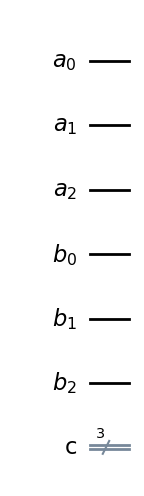

In [3]:
r_a = QuantumRegister(3, 'a')
r_b = QuantumRegister(3, 'b')
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(r_a, r_b, cr)

qc.draw('mpl')

In [4]:
'{0:{fill}3b}'.format(a, fill='0')

'001'

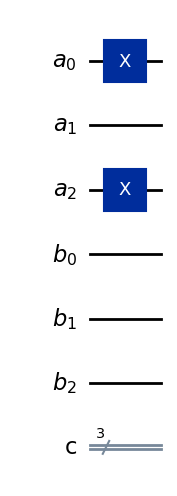

In [5]:
qc.x(r_a[0])
qc.x(r_a[2])
qc.draw('mpl')

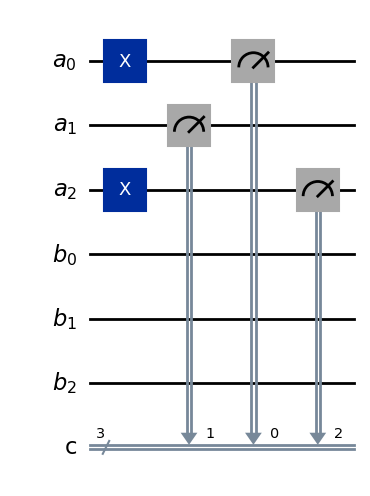

In [6]:
qc.measure(r_a, cr)
qc.draw('mpl')

In [8]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=100)

In [9]:
result = job.result()
counts = result.get_counts(qc)
print(counts)

{'101': 100}


In [5]:
def set_input_state(a, b):

    get_binary = lambda x : '{0:{fill}3b}'.format(x, fill='0')

    r_a = QuantumRegister(3, 'a')
    r_b = QuantumRegister(3, 'b')
    cr = ClassicalRegister(3, 'c')
    qc = QuantumCircuit(r_a, r_b, cr)

    a_binary = get_binary(a)
    b_binary = get_binary(b)

    for i in range(3):
        if a_binary[i] == '1':
            qc.x(r_a[2-i])
        if b_binary[i] == '1':
            qc.x(r_b[2-i])

    return qc, r_a, r_b, cr

In [6]:
def controlled_rotations(qc, reg_a, reg_b, n):
    for i in range(0, n+1):
        qc.cp(np.pi/2**i, reg_b[n-i], reg_a[n])

In [13]:
a = 1
b = 2

qc, r_a, r_b, cr = set_input_state(a, b)

qc.append(QFT(3, do_swaps=False).decompose(), [0, 1, 2])

for i in range(0, 3):
    controlled_rotations(qc, r_a, r_b, 2-i)

qc.append(QFT(3, do_swaps=False).inverse().decompose(), [0, 1, 2])

qc.measure(r_a, cr)

/var/folders/dw/pwbss06d7j371d_5y1pv4xrw0000gn/T/ipykernel_17586/1141810221.py:6: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(3, do_swaps=False).decompose(), [0, 1, 2])
/var/folders/dw/pwbss06d7j371d_5y1pv4xrw0000gn/T/ipykernel_17586/1141810221.py:11: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(3, do_swaps=False).inverse().decompose(), [0, 1, 2])


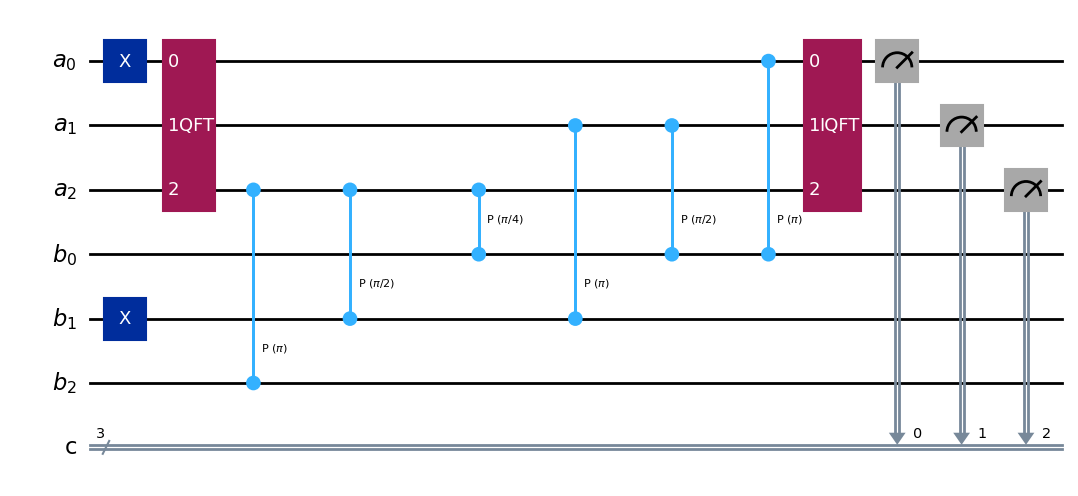

In [14]:
qc.draw('mpl')

In [15]:
qc = qc.decompose()

backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=100)

In [16]:
result = job.result()
counts = result.get_counts()
print(counts)

{'011': 100}
